## Seam Carving

This notebook is an implementation of photo seam carving in Python. Seam carving is a means of content-aware image resizing that removes vertical seams of an image in ascending order of importance. More simply, the least important content is removed first during resizing. The method was first proposed by Avidan and Shamir (2007) in in <a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.570.6321&rep=rep1&type=pdf">*Seam Carving for Content-Aware Image Resizing*</a>.

Further explanations of seam carving can be found on this <a href="https://andrewdcampbell.github.io/seam-carving">blog post</a> by Andrew Campbell and this <a href="https://www.youtube.com/watch?v=rpB6zQNsbQU&ab_channel=TheJuliaProgrammingLanguage">lecture</a> by Grant Sanderson for 18.S191 at MIT.

Deciding what determines a pixel's importance in an image directly influences how a particular seam carving implementation works in practice. We can consider a number of interesting and sensible-sounding metrics for importance, including image edges or predicted visual saliency. The algorithm implemented in this notebook uses edges found through either Sobel filters or the Laplacian operator.

In [163]:
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import numpy as np

In [132]:
plt.rcParams['figure.dpi'] = 120

In [125]:
def show_image(name):
    img = mpimg.imread(name+".jpg")
    plt.title(name)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img)

### Select Image

In [126]:
IMAGE_NAME = 'Christina\'s World, Andrew Wyeth'

Dropdown(description='Image:', index=3, options=('Nighthawks, Edward Hopper', 'Ryder House, Edward Hopper', "C…

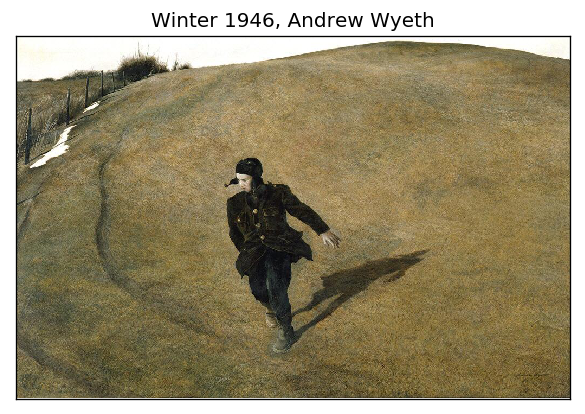

In [128]:
photo_selector = widgets.Dropdown(
    options=['Nighthawks, Edward Hopper', 'Ryder House, Edward Hopper', 
             'Christina\'s World, Andrew Wyeth', 'Winter 1946, Andrew Wyeth',
             'Octagon, Amherst College', 'Head of the Charles', 
             'Varenna, Italy', 'Lake Lucerne, Switzerland'],
    value='Christina\'s World, Andrew Wyeth',
    description='Image:',
    disabled=False,
)

def photo_event_handler(change):
    clear_output()
    display(photo_selector)
    show_image(change.new)

photo_selector.observe(photo_event_handler, names="value")

display(photo_selector)

### Edge Detection

One approach to determining which parts of an image are important is to consider edges. Edges in images frquently mark object boundaries and define their shape. Modifying strong edges by removing a seam that passes through them could lead to significant visual distortions and the loss of semantic information, so an edge-based seam carving algorithm will try to minimize seam cuts through edges.

There are a number of approaches to finding edges in an image.

#### Sobel Filters


#### Laplacian Operator


In [188]:
filter_selector = widgets.RadioButtons(
    options=['Sobel','Laplacian'],
    value='Sobel',
    description='Filter:',
    disabled=False,
)

display(filter_selector)

RadioButtons(description='Filter:', options=('Sobel', 'Laplacian'), value='Sobel')

In [233]:
IMAGE_NAME = photo_selector.value
FILTER = filter_selector.value

img = mpimg.imread(IMAGE_NAME+".jpg")

#Downscale image
if img.shape[1] > 500:
    img = cv2.resize(img, (500, int(img.shape[0] * 500/img.shape[1])))

In [234]:
def display_map(img):

    # Convert image to grayscale for edge detection
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Remove noise from image
    grayscale_img = cv2.GaussianBlur(grayscale_img,(7,7),0)

    if FILTER == 'Laplacian':
        # Convolve with Laplacian
        laplacian = cv2.Laplacian(grayscale_img,cv2.CV_64F)

        # Convert Laplacian 
        abs_laplacian = cv2.convertScaleAbs(laplacian)

        imageMap = abs_laplacian

        # Plot Results
        plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
        plt.title('Original'), plt.xticks([]), plt.yticks([])

        plt.subplot(1,2,2),plt.imshow(abs_laplacian,cmap = 'gray')
        plt.title('Laplacian'), plt.xticks([]), plt.yticks([])


    elif FILTER == 'Sobel':
        # Convolve with Sobel kernels for both directions
        sobelx = cv2.Sobel(grayscale_img,cv2.CV_64F,1,0,ksize=5)  
        sobely = cv2.Sobel(grayscale_img,cv2.CV_64F,0,1,ksize=5)  

        abs_sobelx = cv2.convertScaleAbs(sobelx)
        abs_sobely = cv2.convertScaleAbs(sobely)

        # Combine directional Sobel results
        sobel_grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

        imageMap = sobel_grad

        # Plot Results
        plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
        plt.title('Original'), plt.xticks([]), plt.yticks([])

        plt.subplot(2,2,2),plt.imshow(sobel_grad,cmap = 'gray')
        plt.title('Combined Sobel'), plt.xticks([]), plt.yticks([])

        plt.subplot(2,2,3),plt.imshow(abs_sobelx,cmap = 'gray')
        plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

        plt.subplot(2,2,4),plt.imshow(abs_sobely,cmap = 'gray')
        plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.show()

In [235]:
def get_map(img):

    # Convert image to grayscale for edge detection
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Remove noise from image
    grayscale_img = cv2.GaussianBlur(grayscale_img,(7,7),0)

    if FILTER == 'Laplacian':
        # Convolve with Laplacian
        laplacian = cv2.Laplacian(grayscale_img,cv2.CV_64F)

        # Convert Laplacian 
        abs_laplacian = cv2.convertScaleAbs(laplacian)

        imageMap = abs_laplacian


    elif FILTER == 'Sobel':
        # Convolve with Sobel kernels for both directions
        sobelx = cv2.Sobel(grayscale_img,cv2.CV_64F,1,0,ksize=5)  
        sobely = cv2.Sobel(grayscale_img,cv2.CV_64F,0,1,ksize=5)  

        abs_sobelx = cv2.convertScaleAbs(sobelx)
        abs_sobely = cv2.convertScaleAbs(sobely)

        # Combine directional Sobel results
        sobel_grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

        imageMap = sobel_grad

    
    return imageMap

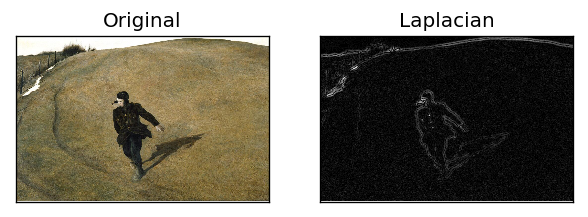

In [236]:
display_map(img)

### Carving Seams

In [237]:
def get_min_seam(imageMap):
    '''
    Dynamic Programming approach to finding min seam for a given image edge map.
    Returns costmap and backtracking array
    '''
    h,w = imageMap.shape[:2]
    
    backtrack = np.zeros_like(imageMap, dtype=np.int)
    
    for i in range(1,h):
        for j in range(0,w):
            if j == 0:
                idx = np.argmin(imageMap[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = imageMap[i - 1, idx + j]
            else:
                idx = np.argmin(imageMap[i - 1, j - 1:j + 2])
                backtrack[i, j] = idx + j - 1
                min_energy = imageMap[i - 1, idx + j - 1]

            imageMap[i, j] += min_energy

    return imageMap, backtrack

In [238]:
def carve_seam(image):
    h,w = image.shape[:2]
    
    costMap,backtrack = get_min_seam(get_map(image))
    
    deletionMask = np.ones((h,w), dtype=np.bool)
    
    #Find smallest element in top row of imageMap
    j = np.argmin(costMap[-1])
    
    for i in reversed(range(h)):
        deletionMask[i,j] = False
        j = backtrack[i,j]
    
    deletionMask = np.stack([deletionMask]*3,axis=2)
    
    image = image[deletionMask].reshape((h,w-1,3))
    
    return image

### Final Result

In [239]:
#Pre-compute images
image_list = [None for i in range(img.shape[1])]
image_list.append(img)

temp_img = img.copy()

for i in range(img.shape[1]-1,round(0.5 * img.shape[1]),-1):
    temp_img = carve_seam(temp_img)
    image_list[i] = temp_img

/Users/nicholascarolan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars


IntSlider(value=269, continuous_update=False, description='Width:', max=500, min=250)

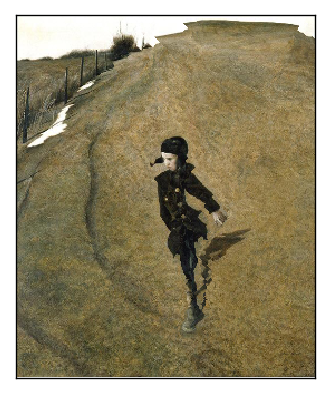

In [240]:
slider = widgets.IntSlider(
    value=img.shape[1],
    min=round(0.5 * img.shape[1]),
    max=img.shape[1],
    step=1,
    description='Width:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def slider_event_handler(change):
    clear_output()
    display(slider)
    plt.xticks([]), plt.yticks([])
    plt.imshow(image_list[slider.value])

slider.observe(slider_event_handler, names="value")    
    
display(slider)

### Resources
<hr>

#### Papers:

```
Avidan, S., & Shamir, A. (2007). Seam carving for content-aware image resizing. In ACM SIGGRAPH 2007 papers (pp. 10-es).
```

#### Content:

- Grant Sanderson's <a href="https://www.youtube.com/watch?v=rpB6zQNsbQU&ab_channel=TheJuliaProgrammingLanguage">lecture</a> for 18.S191 at MIT.

- Andrew Campbell's <a href="https://andrewdcampbell.github.io/seam-carving">blog post</a>.

#### Implementations:

- <a href="https://github.com/andrewdcampbell/seam-carving">Andrew Campbell</a>
- <a href="https://karthikkaranth.me/blog/implementing-seam-carving-with-python/">Karthik Karanth</a>